# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Siti Alya Nurrohmah
- **Email:** sitialyanrrmh@gmail.com
- **ID Dicoding:** alyanrrmh

## Menentukan Pertanyaan Bisnis



```
`# Ini diformat sebagai kode`
```

- Bagaimana distribusi jumlah penyewa sepeda berdasarkan hari, musim dan bulan selama tahun 2011-2012?
- Bagaimana hubungan antara jumlah penyewa casual, registered dan jumlah total dengan temperatur, feels like temperatur, kelembapan (humidity) dan windspeed?

## Import Semua Packages/Library yang Digunakan

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [36]:
file_hour = '/content/drive/My Drive/notebook/bike_dataset/hour.csv'
file_day = '/content/drive/My Drive/notebook/bike_dataset/day.csv'

In [37]:
hour_df = pd.read_csv(file_hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [38]:
day_df = pd.read_csv(file_day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Memuat tabel hour dan day dengan mengimpor dataset dari google drive
- Kedua tabel tersebut ditampilkan 5 baris pertamanya dengan menggunakan syntax nama_dataframe.head()

### Assessing Data

In [39]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Output untuk dataframe hour dan day di atas menunjukan informasi mengenai jumlah kolom, nama kolom, serta tipe data dari dataFrame
- Dalam output di atas terlihat bahwa kedua dataframe tidak mempunyai missing value

In [41]:
print("Jumlah duplikasi data hour: ", hour_df.duplicated().sum())
print("Jumlah duplikasi data day: ", day_df.duplicated().sum())

Jumlah duplikasi data hour:  0
Jumlah duplikasi data day:  0


**Insight:**
- Pada dataset hour dan day tidak terdapat duplikasi data

In [42]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**
- Kode di atas menunjukan analisa statistik deskriptif dari dataFrame hour
- Tidak terdapat kenehan nilai dalam dataFrame hour

In [43]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**
- Kode di atas menunjukan analisa statistik deskriptif dari dataFrame day
- Tidak terdapat kenehan nilai dalam dataFrame day

In [44]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [45]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight**
- Output di atas menunjukan bahwa kedua dataframe tidak terdapat nilai yang hilang (missing value)

### Cleaning Data

In [46]:
#Drop unnecessary columns
hour_df = hour_df.drop(columns=['instant', 'dteday'])

**Insight:**
- Dataset yang dianalisis sudah bersih sehingga tidak terdapat proses cleaning data lebih lanjut
- Melakukan penghapusan kolom instant dan dteday dari dataframe hour karena kedua kolom tersebut tidak diperlukan dalam analisis

## Exploratory Data Analysis (EDA)

### Explore ...

In [48]:
season_string = {1: 'Winter',
               2: 'Spring',
               3: 'Summer',
               4: 'Fall'}
hour_df['season'] = hour_df['season'].map(season_string)
hour_df['season'].head()

,season
0,Winter
1,Winter
2,Winter
3,Winter
4,Winter


In [47]:
mnth_string = {1: 'January',
               2: 'February',
               3: 'March',
               4: 'April',
               5: 'May',
               6: 'June',
               7: 'July',
               8: 'August',
               9: 'September',
               10: 'October',
               11: 'November',
               12: 'December',
               }
hour_df['mnth'] = hour_df['mnth'].map(mnth_string)
hour_df['mnth'].head()

,mnth
0,January
1,January
2,January
3,January
4,January


In [49]:
weekday_string = {1: 'Monday',
               2: 'Tuesday',
               3: 'Wednesday',
               4: 'Thursday',
               5: 'Friday',
               6: 'Saturday',
               0: 'Sunday'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_string)
hour_df['weekday'].head()

,weekday
0,Saturday
1,Saturday
2,Saturday
3,Saturday
4,Saturday


In [50]:
hour_df['temperatur'] = (hour_df['temp'])*47-8
hour_df['temperatur_feels'] = (hour_df['atemp'])*66-16
hour_df['humidity'] = (hour_df['hum'])*100
hour_df['windspeed2'] = (hour_df['windspeed'])*67

Dilakukan normalisasi data berdasarkan yang sudah diketahui dalam file README

In [51]:
hour_df[['casual', 'registered', 'cnt']].describe()

,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000
mean,35.676218,153.786869,189.463088
std,49.305030,151.357286,181.387599
min,0.000000,0.000000,1.000000
25%,4.000000,34.000000,40.000000
50%,17.000000,115.000000,142.000000
75%,48.000000,220.000000,281.000000
max,367.000000,886.000000,977.000000


**Insight**
- Pada statistika deskriptif di atas menunjukkan bahwa rata-rata jumlah penyewa sepeda secara keseluruhan adalah sekitar 189.
- Untuk penyewa casual memiliki rata-rata penyewaan sebanyak 36 sedangkan untuk registered users memiliki rata-rata penyewaan lebih banyak yaitu rata-rata sekitar 154.


In [53]:
hour_df.groupby('weekday')[['casual', 'registered','cnt']].mean().reset_index()

,weekday,casual,registered,cnt
0,Friday,31.458786,164.677121,196.135907
1,Monday,28.553449,155.191206,183.744655
2,Saturday,61.246815,128.962978,190.209793
3,Sunday,56.163469,121.305356,177.468825
4,Thursday,24.872521,171.564144,196.436665
5,Tuesday,23.580514,167.658377,191.238891
6,Wednesday,23.159192,167.971313,191.130505


In [54]:
hour_df.groupby('season')[['casual', 'registered','cnt']].mean().reset_index()

,season,casual,registered,cnt
0,Fall,30.666824,168.202032,198.868856
1,Spring,46.160581,162.183488,208.344069
2,Summer,50.287144,185.729093,236.016237
3,Winter,14.290901,96.823668,111.114569


In [55]:
hour_df.groupby('mnth')[['casual', 'registered','cnt']].mean().reset_index()

,mnth,casual,registered,cnt
0,April,42.311761,144.949200,187.260960
1,August,48.840000,189.257627,238.097627
2,December,14.627782,127.675657,142.303439
3,February,11.158091,101.706935,112.865026
4,January,8.426872,85.997901,94.424773
5,July,52.524866,179.295027,231.819892
6,June,51.323611,189.191667,240.515278
7,March,30.172437,125.238289,155.410726
8,May,50.594758,172.312500,222.907258
9,November,25.471816,151.863605,177.335421


**insight**


In [56]:
# Pilih kolom yang diinginkan
variables_x = ['temperatur', 'temperatur_feels', 'humidity', 'windspeed2']
variables_y = ['casual', 'registered', 'cnt']

# Menghitung korelasi hanya antara variabel-variabel yang diinginkan
correlation_matrix = hour_df[variables_y + variables_x].corr().loc[variables_y, variables_x]

# Tampilkan matriks korelasi
print(correlation_matrix)

            temperatur  temperatur_feels  humidity  windspeed2
casual        0.459616          0.454080 -0.347028    0.090287
registered    0.335361          0.332559 -0.273933    0.082321
cnt           0.404772          0.400929 -0.322911    0.093234


## Visualization & Explanatory Analysis

### Pertanyaan 1:

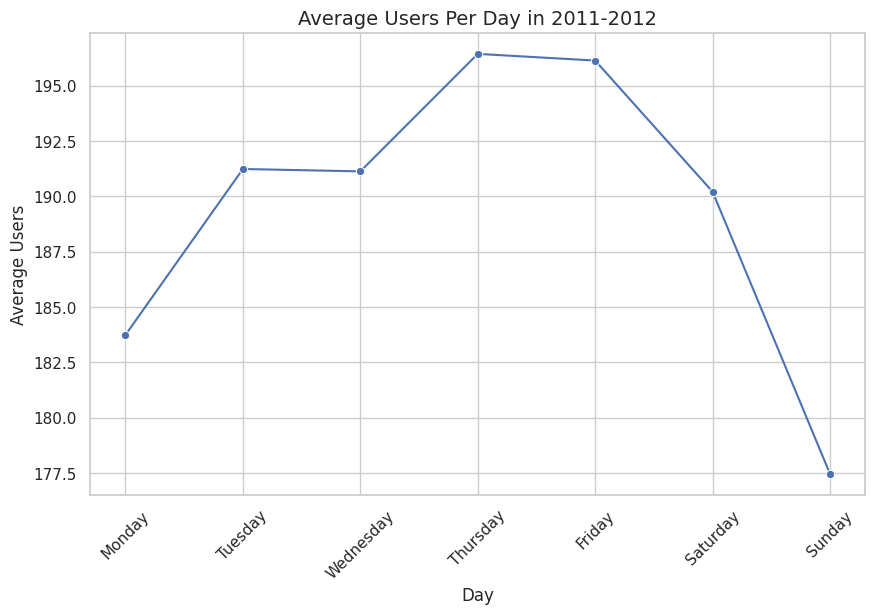

In [61]:
# Mengelompokkan data berdasarkan weekday untuk melihat rata-rata jumlah penyewaan
grouped_data = hour_df.groupby('weekday')['cnt'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Membuat grafik tren rata-rata jumlah penyewaan per hari
plt.figure(figsize=(10,6))
sns.lineplot(x=grouped_data.index, y=grouped_data.values, marker='o')

# Memberi label pada grafik
plt.title('Average Users Per Day in 2011-2012', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Users', fontsize=12)
plt.grid(True)

# Tampilkan plot
plt.xticks(rotation=45)
plt.show()


**insight**
- Hari minggu memiliki rata-rata jumlah penyewa paling sedikit dibandingkan dengan hari lainnya.
- Saat weekdays jumlah penyewa lebih banyak dibandingkan weekend
- Peak Daysnya adalah pada hari Kamis dan Jumat

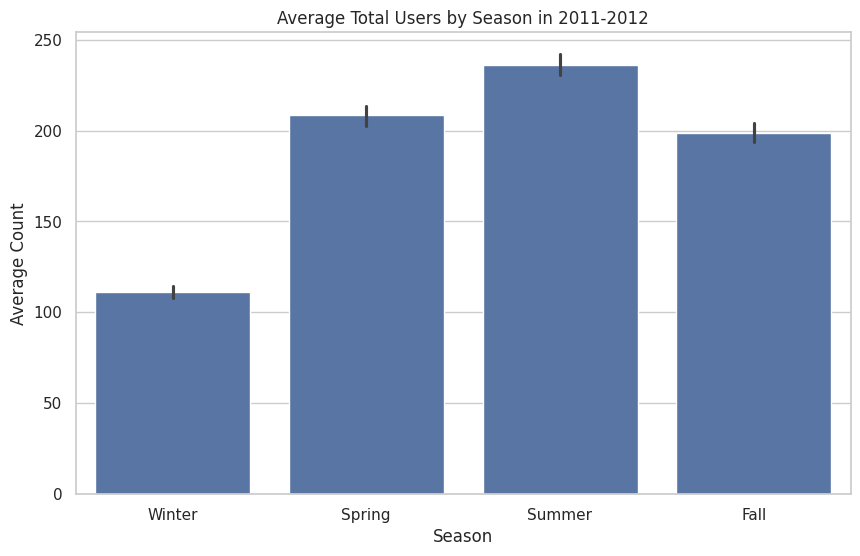

In [58]:
# Membuat plot batang untuk rata-rata jumlah pengguna (cnt) berdasarkan season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=hour_df)

# Menambahkan label dan judul
plt.title('Average Total Users by Season in 2011-2012')
plt.xlabel('Season')
plt.ylabel('Average Count')

# Menampilkan plot
plt.show()

**insight**
- Penyewa sepeda lebih banyak melakukan sewa pada musim panas
- Musim dingin merupakan musim dengan penyewa sepeda yang paling sedikit, bahkan hanya sekitar 50% dari total penyewa sepeda pada musim panas.

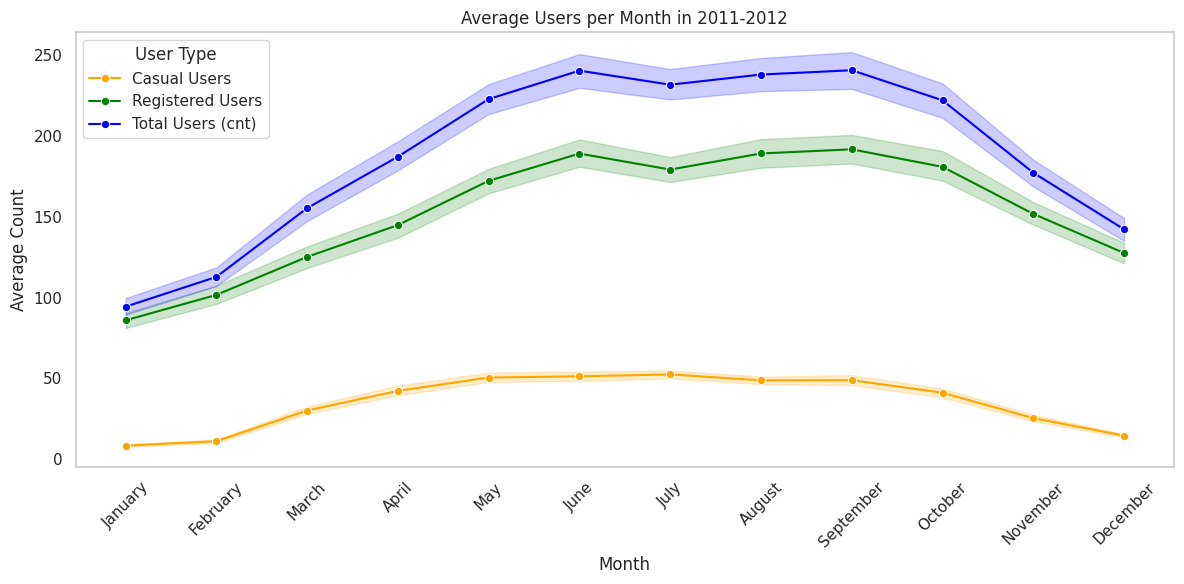

In [62]:
# Definisikan urutan bulan
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Mengatur agar kolom 'mnth' menjadi kategori dengan urutan bulan yang benar
hour_df['mnth'] = pd.Categorical(hour_df['mnth'], categories=month_order, ordered=True)

# Mengatur gaya visualisasi
sns.set(style='whitegrid')

# Membuat plot tren
plt.figure(figsize=(12, 6))

# Plot untuk casual users
sns.lineplot(data=hour_df, x='mnth', y='casual', marker='o', label='Casual Users', color='orange')
# Plot untuk registered users
sns.lineplot(data=hour_df, x='mnth', y='registered', marker='o', label='Registered Users', color='green')
# Plot untuk total users (cnt)
sns.lineplot(data=hour_df, x='mnth', y='cnt', marker='o', label='Total Users (cnt)', color='blue')

# Menambahkan label dan judul
plt.title('Average Users per Month in 2011-2012')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(rotation=45)  # Putar label bulan jika diperlukan
plt.legend(title='User Type')
plt.grid()

# Menampilkan plot
plt.tight_layout()
plt.show()

**insight**
- Jumlah penyewa terus mengalami kenaikan dari bulan Januari sampai dengan bulan Juni
- Peak Month penyewa sepeda adalah pada bulan Juni sampai September
- Setelah bulan September, jumlah penyewa terus mengalami penurunan sampai dengan bulan Desember

### Pertanyaan 2:

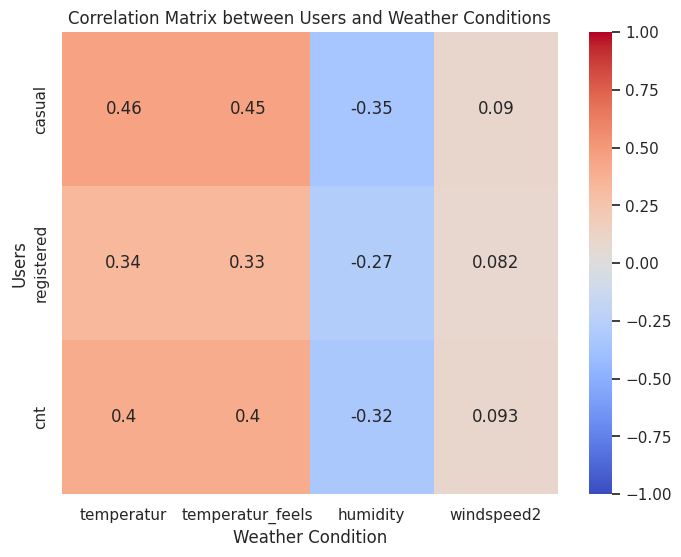

In [60]:
# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Users and Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Users')
plt.show()

**Insight:**
- Temperatur dan temperatur feels memiliki pengaruh yang paling tinggi untuk penyewa casual, registered maupun secara keseluruhan.
- Tingkat kelembapan udara tidak memiliki pengaruh terhadap jumlah penyewa sepeda.
- Kecepatan angin sedikit berpengaruh terhadap jumlah penyewa sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion


- Jumlah penyewa sepeda pada hari weekday jauh lebih banyak dibanding dengan weekend, musim dingin menjadi musim dengan jumlah penyewa sepeda paling sedikit yaitu hanya sekitar 50% dari total penyewa pada musim panas, pada awal bulan dari januari sampai juni penyewa sepeda selalu meningkat namum pada akhir tahun dari bulan september sampai desember jumlah penyewa menurun.
- Dari analisis yang telah dilakukan, temperature dan temperature feels memiliki pengaruh yang cukup besar untuk jumlah penyewa sepeda casual, registered maupun secara keseluruhan diikuti dengan kecepatan angin yang memilii sedikit pengaruh untuk jumlah penyewa sepeda. Namun, untuk kelembapan sendiri tidak memiliki pengaruh dalam jumlah penyewa sepeda